In [281]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [282]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [283]:
df= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dataSLSHSLpqr.csv')

df.head(11)

,p,q,r,A1,L1,A2,L2,A3,L3
0,3,2,2,0.697272,588,0.897795,622,0.673578,655
1,3,3,2,0.737086,592,0.917456,621,0.701330,650
2,3,4,2,0.731879,595,0.917330,621,0.696167,647
3,3,5,2,0.608153,596,0.905459,621,0.632662,645
4,3,6,2,0.492272,597,0.892537,621,0.527849,644
5,3,7,2,0.412174,598,0.882359,621,0.404073,643
6,3,8,2,0.273795,598,0.875351,621,0.301801,643
7,3,9,2,0.199852,599,0.870844,621,0.206111,643
8,3,2,3,0.739739,592,0.829748,621,0.684369,651
9,3,3,3,0.781619,596,0.895376,621,0.726220,645


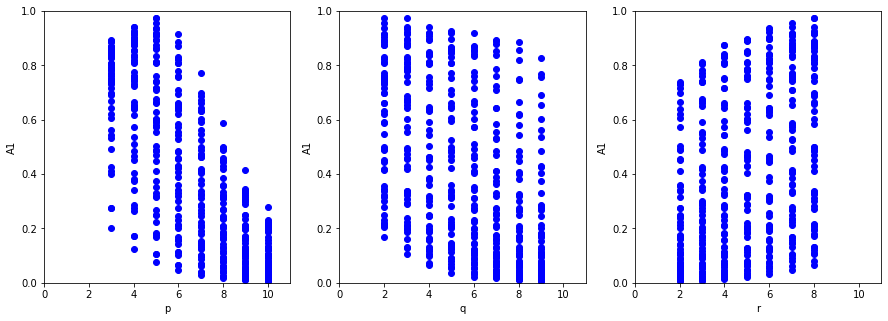

In [284]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.p, df.A1,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("p")
plt.ylabel("A1")
plt.subplot(1,3,2)
plt.scatter(df.q, df.A1,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("q")
plt.ylabel("A1")
plt.subplot(1,3,3)
plt.scatter(df.r, df.A1,  color='blue')
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel("r")
plt.ylabel("A1")
plt.show()

In [285]:
cdf = df[['p','q','r','A1']]
cdf.head(9)

,p,q,r,A1
0,3,2,2,0.697272
1,3,3,2,0.737086
2,3,4,2,0.731879
3,3,5,2,0.608153
4,3,6,2,0.492272
5,3,7,2,0.412174
6,3,8,2,0.273795
7,3,9,2,0.199852
8,3,2,3,0.739739


In [286]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(df)

448

In [287]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['p','q','r']])
y = np.asanyarray(train[['A1']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('intercepts: ', regr.intercept_)

Coefficients:  [[-0.0986053  -0.05804077  0.05093781]]
intercepts:  [1.11456525]


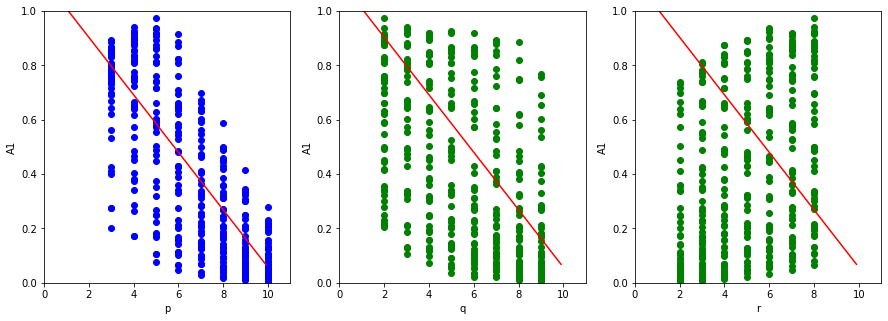

In [288]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(train.p, train.A1,  color='blue')
plt.xlabel("p")
plt.ylabel("A1")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX + regr.coef_[0][2]*XX
plt.plot(XX, yy, '-r' )
plt.ylim(0,1)
plt.xlim(0,11)

plt.subplot(1,3,2)
plt.scatter(train.q, train.A1,  color='green')
plt.xlabel("q")
plt.ylabel("A1")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
plt.ylim(0,1)
plt.xlim(0,11)
plt.plot(XX, yy, '-r' )

plt.subplot(1,3,3)
plt.scatter(train.r, train.A1,  color='green')
plt.xlabel("r")
plt.ylabel("A1")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
plt.ylim(0,1)
plt.xlim(0,11)
plt.plot(XX, yy, '-r' )


In [289]:
y_hat= regr.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)

from sklearn.metrics import r2_score 

print('Variance score: %.2f' % r2_score(y, y_hat))

Variance score: 0.93


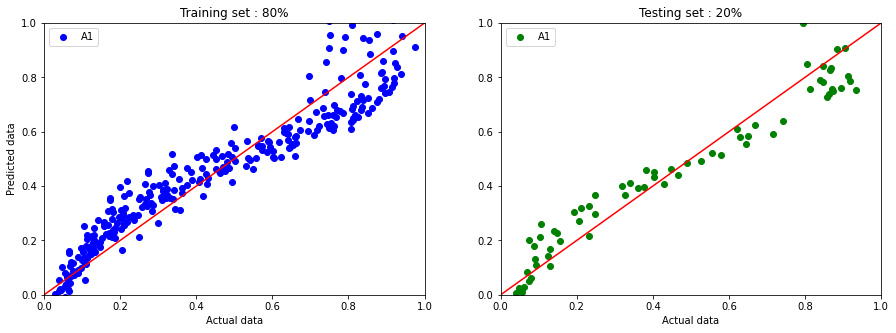

In [290]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y_pred_train = regr.intercept_[0]+ regr.coef_[0][0]*x_train[:,0] + regr.coef_[0][1]*x_train[:,1] + regr.coef_[0][2]*x_train[:,2]
plt.scatter(  y_train , y_pred_train, color='blue' , label='A1')
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
XX = np.arange(0.0, 10.0, 0.1)
#yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX
yy = XX
plt.plot(XX, yy, '-r' )
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Training set : 80%')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Actual data")

yy = XX
plt.plot(XX, yy, '-r' )
y_pred_test = regr.intercept_[0]+ regr.coef_[0][0]*x_test[:,0] + regr.coef_[0][1]*x_test[:,1] + regr.coef_[0][2]*x_test[:,2]
plt.ylim(0,1)
plt.xlim(0,1)
plt.scatter( y_test ,y_pred_test,  color='green', label='A1')
plt.title('Testing set : 20%')
plt.legend()

In [291]:
print(y_train)


[[0.29993138]
 [0.34469431]
 [0.80699284]
 [0.1728338 ]
 [0.45130039]
 [0.83822123]
 [0.45179664]
 [0.02811556]
 [0.13212667]
 [0.53648886]
 [0.1816046 ]
 [0.19985224]
 [0.92114805]
 [0.74895899]
 [0.88664044]
 [0.88922397]
 [0.17814619]
 [0.08955831]
 [0.61684441]
 [0.79035904]
 [0.33877472]
 [0.20752291]
 [0.64544906]
 [0.41809004]
 [0.04608184]
 [0.85134583]
 [0.660484  ]
 [0.28657221]
 [0.59186221]
 [0.1835762 ]
 [0.12553088]
 [0.48416821]
 [0.6992795 ]
 [0.40787638]
 [0.12909467]
 [0.80846824]
 [0.2031401 ]
 [0.73702972]
 [0.09807037]
 [0.27790295]
 [0.50156091]
 [0.89096493]
 [0.36159229]
 [0.77679045]
 [0.06964869]
 [0.11394154]
 [0.06595438]
 [0.11181897]
 [0.09796059]
 [0.26590863]
 [0.31189097]
 [0.45950938]
 [0.32858999]
 [0.76651832]
 [0.27379516]
 [0.26710289]
 [0.91929096]
 [0.1311968 ]
 [0.41080923]
 [0.10610546]
 [0.60085665]
 [0.06759184]
 [0.73973926]
 [0.05627833]
 [0.10674278]
 [0.07680694]
 [0.33634777]
 [0.54208807]
 [0.22442291]
 [0.82270214]
 [0.41217434]
 [0.06

In [292]:
print(y_test)

[[0.07553908]
 [0.0734133 ]
 [0.09157733]
 [0.84616609]
 [0.57926136]
 [0.21211499]
 [0.23230025]
 [0.71595719]
 [0.04887259]
 [0.10329684]
 [0.15729014]
 [0.80432774]
 [0.19293112]
 [0.65053467]
 [0.87070322]
 [0.52593848]
 [0.87392939]
 [0.86791186]
 [0.23115816]
 [0.03735732]
 [0.79435114]
 [0.02304928]
 [0.1473023 ]
 [0.33939962]
 [0.64425464]
 [0.05628662]
 [0.03409135]
 [0.37652435]
 [0.86614039]
 [0.84057763]
 [0.40380162]
 [0.24825708]
 [0.0354937 ]
 [0.86346857]
 [0.42816703]
 [0.91389314]
 [0.38271423]
 [0.04061072]
 [0.89499978]
 [0.48997444]
 [0.62009302]
 [0.32822217]
 [0.85783383]
 [0.04754215]
 [0.10678209]
 [0.31869215]
 [0.09346913]
 [0.90554026]
 [0.74216882]
 [0.44899673]
 [0.12960004]
 [0.24749326]
 [0.88288215]
 [0.00640954]
 [0.08832819]
 [0.0222574 ]
 [0.14046812]
 [0.36046411]
 [0.91938679]
 [0.01716549]
 [0.06836966]
 [0.06021525]
 [0.81204501]
 [0.12523231]
 [0.02940442]
 [0.66908672]
 [0.62884984]
 [0.13078295]
 [0.40308777]
 [0.93506034]
 [0.46505088]
 [0.84

In [293]:
print(y_pred_test)

[ 0.20104742  0.04916262  0.13029167  0.78323455  0.51377725  0.3203993
  0.32750226  0.59312692  0.02458341  0.21142071  0.19870573  0.84837828
  0.30385168  0.58275363  0.75631364  0.49068899  0.74977299  0.83417236
  0.21618198 -0.04056033  1.00119172 -0.08439518  0.22889696  0.40955994
  0.55583272  0.01037748 -0.01925144  0.39591632  0.8270694   0.79033751
  0.45246615  0.36806678 -0.03345737  0.73883739  0.40806899  0.80398113
  0.45956911  0.00710715  0.76014628  0.48414833  0.60911222  0.36750447
  0.7284641  -0.03729     0.25908819  0.39918665  0.10898278  0.90968939
  0.6407944   0.46283944  0.1072034   0.29731103  0.90258642 -0.29197906
  0.17795915 -0.13916563  0.23599992  0.39208369  0.78650487 -0.09476847
  0.08262418  0.02785373  0.75687595  0.14393528 -0.07402189  0.62331815
  0.57892099  0.17029388  0.43264821  0.75304332  0.43975117  0.84127532
  0.27273181  0.06131529  0.52088022]


In [294]:

print(y_pred_train)

[ 0.26384947  0.31478728  0.61060317  0.35059053  0.53181581  0.94315095
  0.46433039  0.00383682  0.24581091  0.50340396  0.30292304  0.39825801
  0.85164861  0.90641906  0.76192566  0.81996643  0.27983477  0.08972714
  0.56144474  0.95025391  0.35208147  0.29020806  0.54545943  0.36245476
  0.10244212  0.72519377  0.51199787  0.40152834  0.56293569  0.23216729
  0.21469104  0.51760989  0.71574912  0.41517196  0.19160277  0.68462925
  0.31329633  0.65827065  0.17085619  0.36899542  0.49125129  0.85875157
  0.392646    0.67752629  0.11991837  0.13356199  0.01364781  0.21852367
  0.10010043  0.4086313   0.38498073  0.45722743  0.46049775  0.65294707
  0.45629879  0.35386085  0.79687817  0.20197606  0.42554525  0.25198523
  0.52798318  0.10571245  0.85548125  0.03168637  0.05626558  0.08589451
  0.51853853  0.49452162  0.28693774  0.71247879  0.51433956  0.15337993
  0.81108409  0.61948551  0.57565066  0.67425596  0.1948731   1.05212953
  0.24637322  0.18833244  0.50667429  0.15103825  0